In [2]:


medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'


In [3]:
from urllib.request import urlretrieve

In [4]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x22039cd3940>)

In [5]:
import pandas as pd 

In [6]:
df_medical = pd.read_csv('medical.csv')

In [7]:
df_medical

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
df_medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df_medical.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [10]:
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [11]:
import plotly.express as px 

In [12]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#000000'

In [13]:
df_medical.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [14]:
fig = px.histogram(df_medical, x= 'age', marginal='box', nbins=47, title='Age Distribution')
fig.update_layout(bargap=0.1)
fig.show()

In [15]:
fig = px.histogram(df_medical, x= 'bmi', marginal='box', color_discrete_sequence=['red'], title='BMI Distribution')
fig.update_layout(bargap=0.1)
fig.show()

In [16]:
fig = px.histogram(df_medical, x='charges', marginal='box', color='smoker', color_discrete_sequence=['green', 'grey'], title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [17]:
fig = px.histogram(df_medical, x='charges', marginal='box', color='sex', color_discrete_sequence=['blue', 'red'], title='Annual Medical charges in Relation to Sex')
fig.update_layout(bargap=0.1)
fig.show()

In [18]:
fig = px.histogram(df_medical, x='charges', marginal='box', color='region', color_discrete_sequence=['red', 'green', 'blue', 'gray'], title='Annual Medical Charges in Relation to Region')
fig.update_layout(bargap=0.1)
fig.show()

In [19]:
df_medical.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [20]:
px.histogram(df_medical, x='smoker', color='sex', title='smoker')

In [21]:
df_medical.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [22]:
px.histogram(df_medical, x='region', color='sex', title='Sex distribution')

In [23]:
px.histogram(df_medical, x='sex', color='children', title='Sex distribution')

In [24]:
fig = px.scatter(df_medical, x='age', y='charges', color='smoker', opacity=0.8, hover_data=['sex'], title="Age vs Charges")
fig.update_traces(marker_size=5)
fig.show()

In [25]:
fig = px.scatter(df_medical, x='bmi', y='charges', color='smoker', opacity=0.8, hover_data=['sex'], title='BMI vs Medical Charges')
fig.update_traces(marker_size = 5)
fig.show()

In [26]:
fig= px.scatter(df_medical, x='sex', y='charges', color='smoker', opacity=0.8, hover_data=['sex'], title="Sex vs Medical Charges")
fig.update_traces(marker_size = 5)
fig.show()

In [27]:
fig= px.violin(df_medical, x='region', y='charges', color='smoker', hover_data=['sex'], title="Region vs Medical Charges")
fig.update_traces(marker_size = 5)
fig.show()

In [28]:
fig= px.scatter(df_medical, x='children', y='charges', color='sex', opacity=0.8, hover_data=['sex'], title="Sex vs Medical Charges")
fig.update_traces(marker_size = 5)
fig.show()

In [29]:
df_medical.charges.corr(df_medical.age)

0.2990081933306478

In [30]:
df_medical.charges.corr(df_medical.bmi)

0.19834096883362887

In [31]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = df_medical.smoker.map(smoker_values)
df_medical.charges.corr(smoker_numeric)

0.7872514304984778

In [32]:
df_medical.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

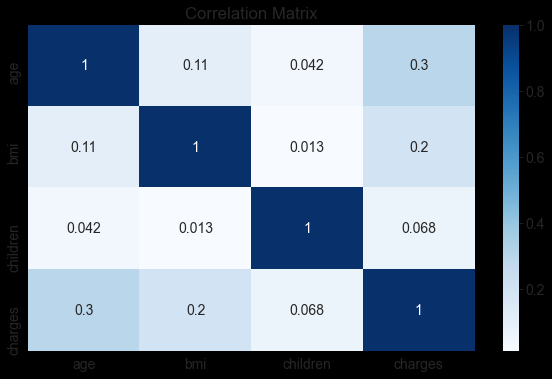

In [33]:
sns.heatmap(df_medical.corr(), cmap='Blues', annot=True)
plt.title("Correlation Matrix")

In [34]:
df_non_smokers = df_medical[df_medical.smoker == 'no']

<AxesSubplot:title={'center':'Age vs Medical Charges'}, xlabel='age', ylabel='charges'>

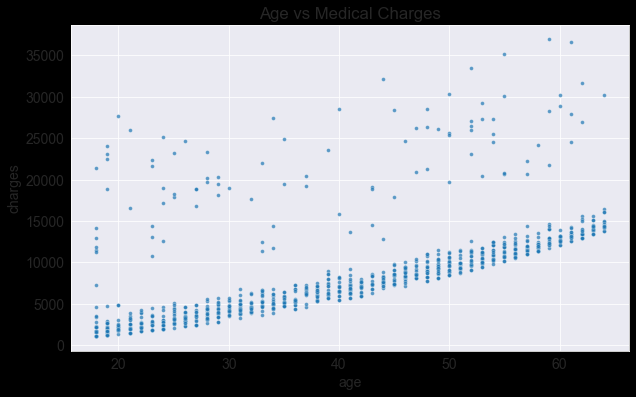

In [35]:
plt.title('Age vs Medical Charges')
sns.scatterplot(data=df_non_smokers, x='age', y='charges', alpha=0.7, s=15)

In [36]:
def estmate_charges(age, w, b):
    return w * age + b

In [37]:
w = 50
b = 100

In [38]:
ages = df_non_smokers.age
estimated_charges = estmate_charges(ages, w, b)

Text(0, 0.5, 'estimated charges')

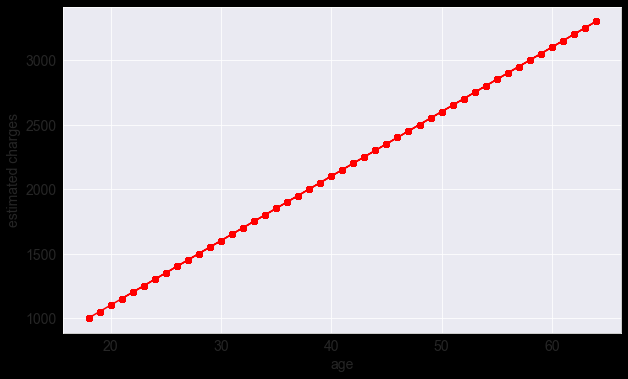

In [39]:
plt.plot(ages, estimated_charges, 'r-o');
plt.xlabel('age');
plt.ylabel('estimated charges')

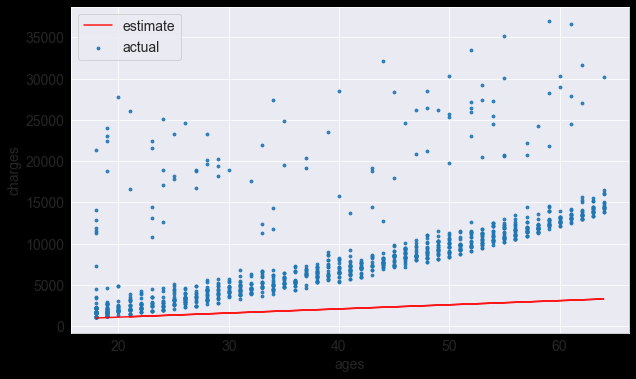

In [40]:
target = df_non_smokers.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9)
plt.scatter(ages, target, s=8, alpha=0.9)
plt.xlabel('ages')
plt.ylabel('charges')
plt.legend(['estimate', 'actual'])

In [41]:
def try_parameters(w, b):
    ages = df_non_smokers.age
    target = df_non_smokers.charges

    estimated_charges = estmate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8, alpha=0.9)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['estimate', 'Actual'])

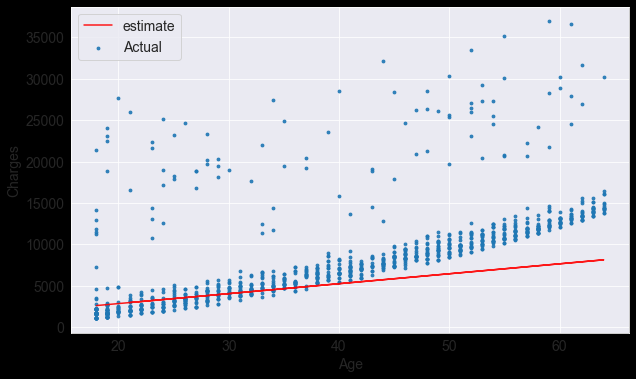

In [42]:
try_parameters(120, 460)

In [43]:
import numpy as np 
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets, predictions)))

In [44]:
w = 50
b = 100

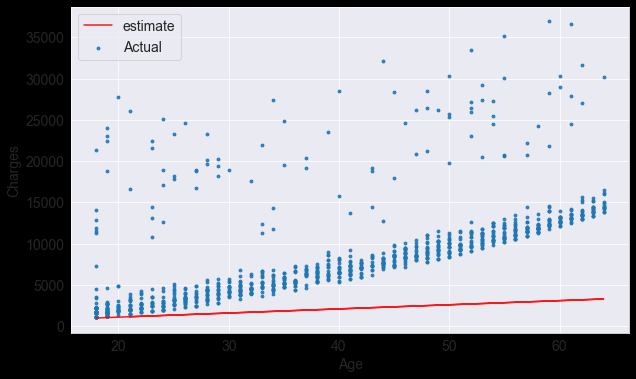

In [45]:
try_parameters(w, b)

In [47]:
from sklearn.linear_model import LinearRegression

In [49]:
model_linear = LinearRegression()

In [51]:
inputs = df_non_smokers[['age']]
targets = df_non_smokers.charges
print('inputs.shape :', inputs.shape)
print('targets.shape :', targets.shape)

inputs.shape : (1064, 1)
targets.shape : (1064,)


In [54]:
model_linear.fit(inputs, targets)

LinearRegression()

In [55]:
model_linear.predict([[23], [37], [61]])

array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [56]:
predictions = model_linear.predict(inputs)

In [57]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [58]:
rmse(targets, predictions)

10345.459763750785

In [60]:
model_linear.coef_

array([267.24891283])

In [61]:
model_linear.intercept_

-2091.4205565650864

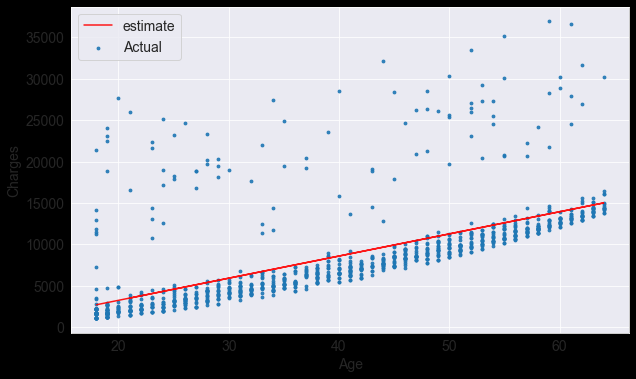

In [62]:
try_parameters(model_linear.coef_, model_linear.intercept_)

In [69]:
inputs = df_non_smokers[['age', 'bmi']]
targets = df_non_smokers['charges']

In [70]:
linear_model_2 = LinearRegression()

In [71]:
linear_model_2.fit(inputs, targets)

LinearRegression()

In [72]:
predictions = linear_model_2.predict(inputs)

In [73]:
loss = rmse(targets, predictions)

In [74]:
loss

10345.459763750785

In [75]:
df_non_smokers.charges.corr(df_non_smokers.bmi)

0.08403654312833271

In [77]:
fig = px.scatter(df_non_smokers, x='bmi', y='charges', title='BMI vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [78]:
fig = px.scatter_3d(df_non_smokers, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

In [79]:
linear_model_2.coef_

array([266.87657817,   7.07547666])

In [80]:
linear_model_2.intercept_

-2293.6320906488727

In [81]:
df_non_smokers.charges.corr(df_non_smokers.children)

0.13892870453542205

In [82]:
fig = px.strip(df_non_smokers, x='children', y='charges', title='Children vs Charges')
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

In [83]:
inputs, targets = df_non_smokers[['age', 'bmi', 'children']], df_non_smokers['charges']

In [84]:
linear_model_3 = LinearRegression()

In [85]:
linear_model_3.fit(inputs, targets)

LinearRegression()

In [87]:
predictions = linear_model_3.predict(inputs)

In [88]:
loss = rmse(targets, predictions)

In [89]:
loss

10345.459763750785

In [90]:
inputs, targets = df_medical[['age', 'bmi', 'children']], df_medical['charges']

In [91]:
linear_model_4 = LinearRegression()

In [92]:
linear_model_4.fit(inputs, targets)

LinearRegression()

In [93]:
predictions = linear_model_4.predict(inputs)

In [94]:
loss = rmse(targets, predictions)

In [95]:
loss

17962.373829444277

<AxesSubplot:xlabel='smoker', ylabel='charges'>

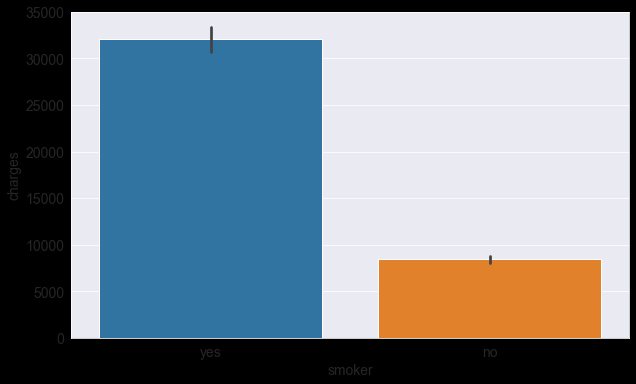

In [96]:
sns.barplot(data=df_medical, x='smoker', y='charges')

In [97]:
smoker_coded = {'no': 0, 'yes': 1}
df_medical['smoker_coded'] = df_medical.smoker.map(smoker_coded)

In [98]:
df_medical.charges.corr(df_medical.smoker_coded)

0.7872514304984778

In [99]:
inputs, targets = df_medical[['age', 'bmi', 'children', 'smoker_coded']], df_medical['charges']

In [100]:
linear_model_5 = LinearRegression().fit(inputs, targets)

In [101]:
predictions = linear_model_5.predict(inputs)

In [102]:
loss = rmse(targets, predictions)

In [103]:
loss

17962.373829444277

<AxesSubplot:xlabel='sex', ylabel='charges'>

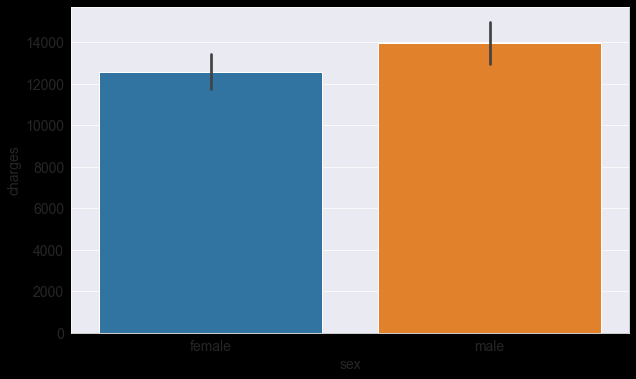

In [104]:
sns.barplot(data=df_medical, x='sex', y='charges')

In [105]:
sex_coded = {'female': 0, 'male': 1}

In [106]:
df_medical['sex_coded'] = df_medical.sex.map(sex_coded)

In [107]:
df_medical.charges.corr(df_medical.sex_coded)

0.05729206220202533

In [108]:
inputs, targets = df_medical[['age', 'bmi', 'children', 'smoker_coded', 'sex_coded']], df_medical['charges']

In [109]:
linear_model_6 = LinearRegression().fit(inputs, targets)

In [113]:
predictions_6 = linear_model_6.predict(inputs)

In [114]:
loss = rmse(targets, predictions_6)
loss

17962.373829444277

In [115]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(df_medical[['region']])
encoder.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [116]:
encoded = encoder.transform(df_medical[['region']]).toarray()
encoded

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [120]:
df_medical[['northeast', 'northwest', 'southeast', 'southwest']] = encoded

In [121]:
df_medical

,age,sex,bmi,children,smoker,region,charges,smoker_coded,sex_coded,northeast,northwest,southwest,southweest,southeast
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,1.0,1.0,0.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,0.0,0.0,1.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,0.0,0.0,1.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,0.0,0.0,1.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,1.0,1.0,0.0


In [122]:
input_columns = ['age', 'bmi', 'children', 'smoker_coded', 'sex_coded', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = df_medical[input_columns], df_medical['charges']

In [123]:
linear_model_7 = LinearRegression().fit(inputs, targets)

In [124]:
predictions = linear_model_7.predict(inputs)

In [125]:
loss = rmse(targets, predictions)
loss

17962.373829444277

In [126]:
linear_model_7.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [127]:
linear_model_7.intercept_

-12525.547811195447

In [128]:
weights_df = pd.DataFrame({
    'feature': np.append(input_columns, 1),
    'weight' : np.append(linear_model_7.coef_, linear_model_7.intercept_)
})
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_coded,23848.534542
4,sex_coded,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


In [129]:
from sklearn.preprocessing import StandardScaler

In [130]:
numerical_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(df_medical[numerical_cols])

StandardScaler()

In [131]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [132]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [133]:
scaled_inputs = scaler.transform(df_medical[numerical_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [134]:
categorical_cols = ['smoker_coded', 'sex_coded', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_val = df_medical[categorical_cols].values

In [136]:
inputs = np.concatenate((scaled_inputs, categorical_val), axis=1)
targets = df_medical.charges

In [137]:
linear_model_8 = LinearRegression().fit(inputs, targets)

In [138]:
predictions = linear_model_8.predict(inputs)

In [139]:
loss = rmse(targets, predictions)
loss

17962.373829444277

In [141]:
weights_df = pd.DataFrame({
    'feature': np.append(numerical_cols + categorical_cols, 1),
    'weight' : np.append(linear_model_8.coef_, linear_model_8.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_coded,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_coded,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


In [142]:
from sklearn.model_selection import train_test_split

In [143]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

In [144]:
linear_model_9 = LinearRegression().fit(inputs_train, targets_train)

In [145]:
predcitions_test = linear_model_9.predict(inputs_test)

In [146]:
loss = rmse(targets_test, predcitions_test)
loss

18378.306336353497

In [147]:
prediction_train = linear_model_9.predict(inputs_train)

In [148]:
loss = rmse(targets_train, prediction_train)
loss

17915.48518173262